In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':.5,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Industries'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-26 to 2019-06-26 - 47'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-shrp'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
XLP,64,2.290011,1.523866,1.393393,4.021399
VDC,64,1.805596,1.536664,1.066550,4.396198
XAR,64,2.829361,2.843618,0.936376,6.155941
ITB,64,3.243650,4.049082,0.759921,5.964365
IGF,64,1.448624,1.777327,0.721284,2.242252
VPU,64,1.402515,1.757381,0.703233,3.258989
XLU,64,1.440174,1.841847,0.691429,3.426057
IYF,64,1.457180,2.591970,0.497889,5.206847
ITA,64,1.450267,2.987229,0.429696,6.911840


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['XLP'])

['XLP'] 0.2108867357999813 0.6 0.8042797087596598 1.3933929729596786
['XLP', 'XAR'] 0.020337735097557763 0.1674880181541063 1.0177339859394912 1.1648842689960397
['XLP', 'VPU'] -0.19571235974542833 0.12456176797961782 0.7280387258630757 1.0483128535881219


['XLP', 'VPU']

In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['XLP', 'VPU'], sr=0)

['XLP', 'VPU'] 0.8526004938426935 0.12456176797961782 0.7280387258630757 1.0483128535881219
['XLP', 'VPU', 'VDC'] 0.7755412263448767 0.3971022420432367 0.7784389843016399 1.054391964191135
['XLP', 'VPU', 'VDC', 'XAR'] 0.30498341396630047 0.21335710996023996 0.8916263040060606 1.0248878644014516
['XLP', 'VPU', 'XAR', 'ITB'] 0.2593690466621095 0.08933439273047143 0.9700346539316381 0.9482305861974494
['XLP', 'VPU', 'XAR', 'IGF'] 0.18180718608729293 0.1978781590339532 0.7839290270533398 0.9385712227277621
['XLP', 'VPU', 'ITB', 'XLU'] 0.1753236444655759 0.14178321061617516 0.8335404338494008 0.8869940336343181


['XLP', 'VPU', 'ITB', 'XLU']

In [9]:
quote.setup_mask(['XLP', 'VPU', 'ITB'])
quote.find_optimal_ratio(21, 2)

({'XLP': 0.25, 'VPU': 0.6, 'ITB': 0.16}, 1.9077, 1.1723)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,64.0,1.879245,1.172131,-1.779818,1.353585,2.086497,2.649461,4.345250,1.461081,2.992150
XLP,64.0,2.290011,1.523866,-2.438597,1.645307,2.731452,3.284143,4.497904,1.393393,4.021399
ITB,64.0,3.243650,4.049082,-3.981024,0.743688,2.118206,7.082778,13.079428,0.759921,5.964365
VPU,64.0,1.402515,1.757381,-1.713539,0.046302,1.384789,2.827354,5.136484,0.703233,3.258989


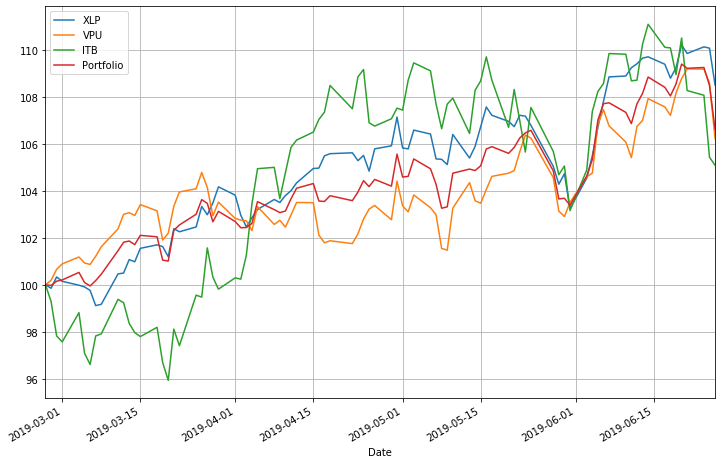

In [11]:
%pylab inline
quote.setup_mask(['XLP', 'VPU', 'ITB'])
quote.graph(21, {'XLP': .25, 'VPU': .6, 'ITB': .15})